In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle

## Data Import and Preprocessing

In [2]:
df=pd.read_csv('./train.csv',parse_dates=['datetime'],index_col=0)
df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


# Data Documentation

##### datetime - hourly date + timestamp  
##### season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
##### holiday - whether the day is considered a holiday
##### workingday - whether the day is neither a weekend nor holiday
##### weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
##### 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
##### 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
##### 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
##### temp - temperature in Celsius
##### atemp - "feels like" temperature in Celsius
##### humidity - relative humidity
##### windspeed - wind speed
##### casual - number of non-registered user rentals initiated
##### registered - number of registered user rentals initiated
##### count - number of total rentals

### Datetime Conversion

In [3]:
def add_feature(df1):
    df1['year']=df1.index.year
    df1['month']=df1.index.month
    df1['dayofmonth']=df1.index.day
    df1['dayofweek']=df1.index.dayofweek
    df1['hour']=df1.index.hour

In [4]:
add_feature(df)
df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofmonth,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1


In [5]:
df.shape

(10886, 16)

## renaming count column to demand
### because it's more intuitive

In [6]:
df = df.rename(columns={'count':'demand'})

#### Dropping unwanted columns

In [7]:
df.reset_index(drop=True, inplace=True)
#Dropping casual and registered because they dont provide any information
df = df.drop(['casual','registered'],axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,demand,year,month,dayofmonth,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


### Checking Missing Values

In [8]:
df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
year          0
month         0
dayofmonth    0
dayofweek     0
hour          0
dtype: int64

## Exploratory Data Analysis

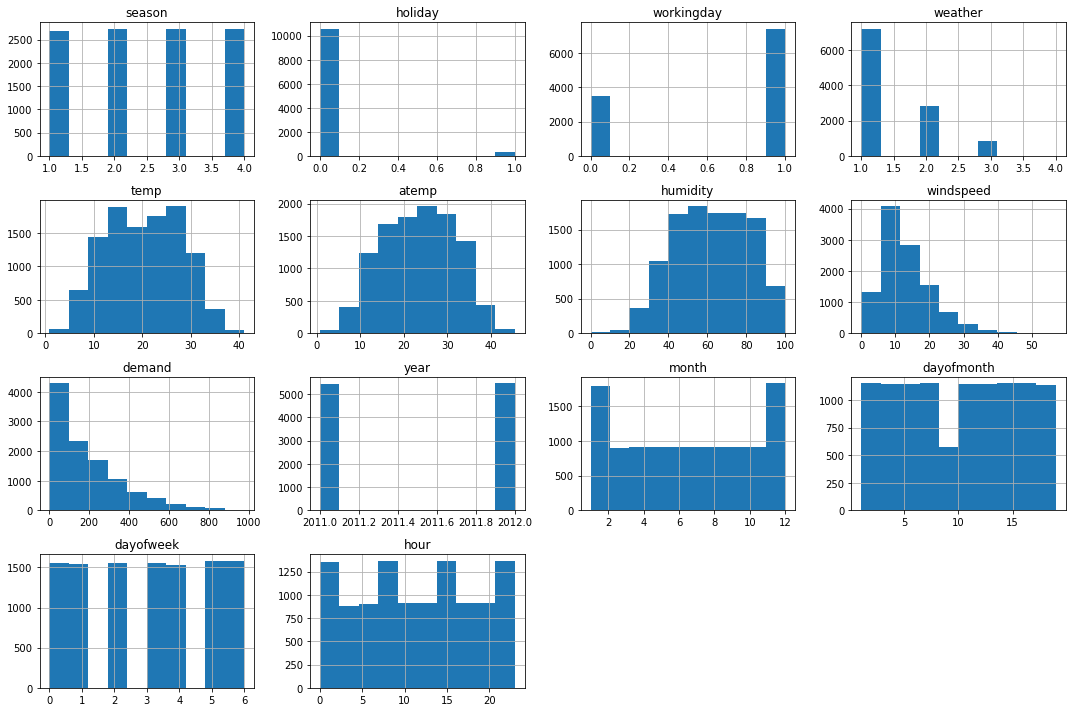

In [9]:
df.hist(figsize = (15,10))
plt.tight_layout()
plt.show()

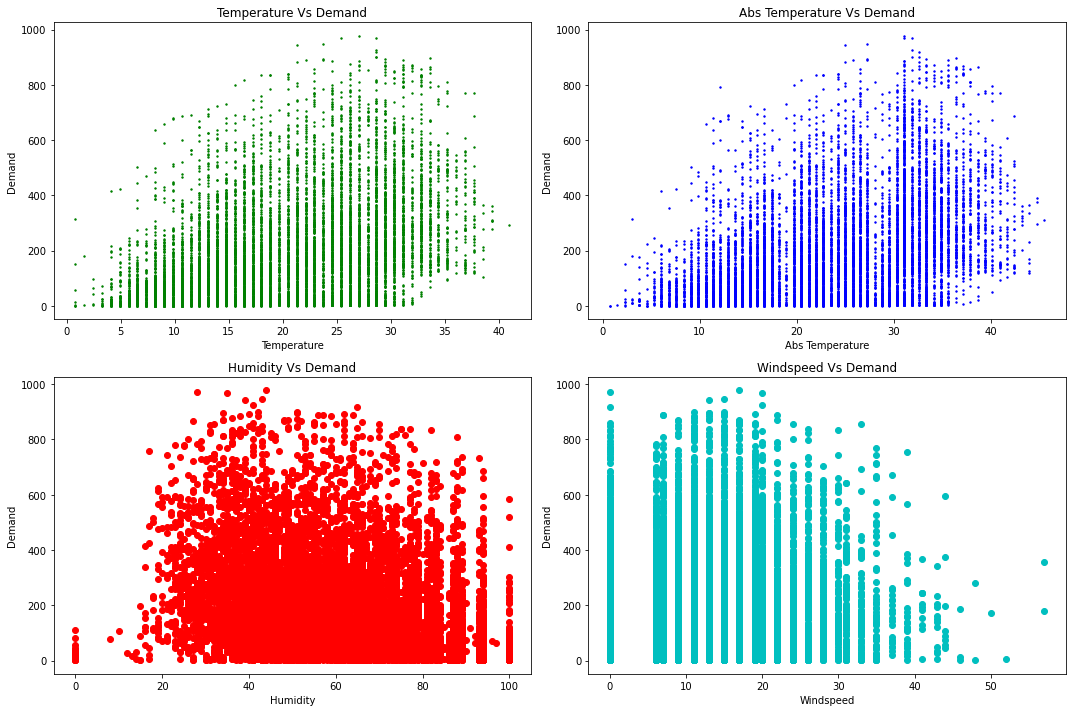

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1,)
plt.title('Temperature Vs Demand')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.scatter(df['temp'],df['demand'],s=2,c='g')

plt.subplot(2,2,2)
plt.title('Abs Temperature Vs Demand')
plt.xlabel('Abs Temperature')
plt.ylabel('Demand')
plt.scatter(df['atemp'],df['demand'],s=2,c='b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.xlabel('Humidity')
plt.ylabel('Demand')
plt.scatter(df['humidity'],df['demand'],c='r')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.xlabel('Windspeed')
plt.ylabel('Demand')
plt.scatter(df['windspeed'],df['demand'],c='c')

plt.tight_layout()

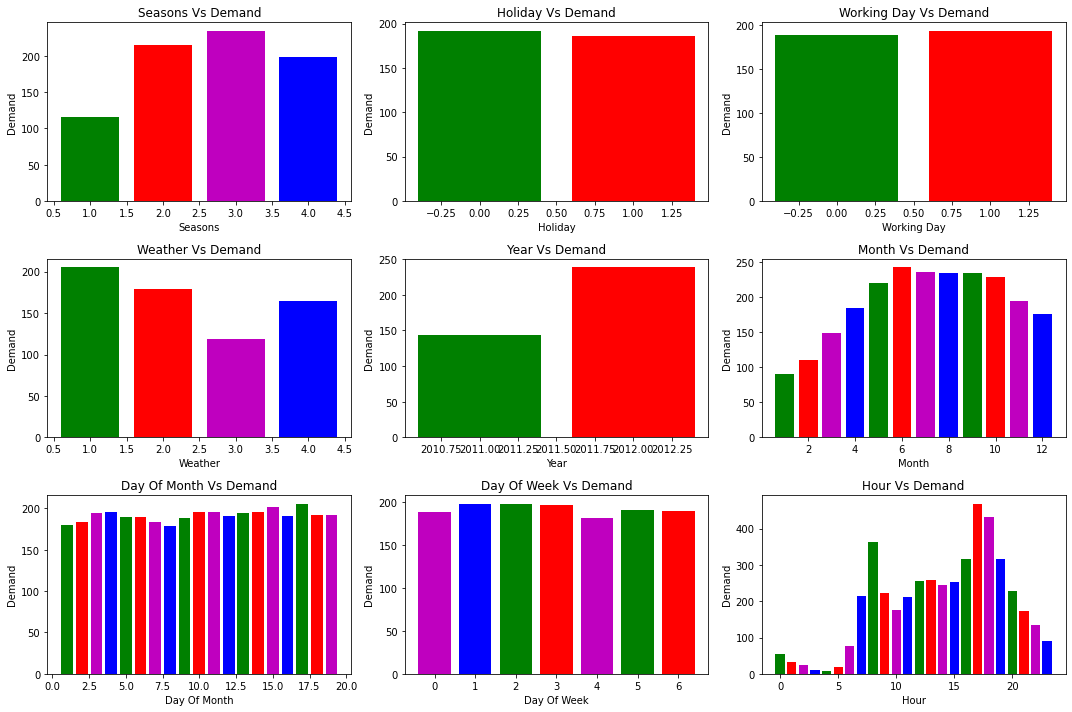

In [11]:
colors = ['g','r','m','b']

plt.figure(figsize=(15,10))
plt.subplot(3,3,1,)
plt.title('Seasons Vs Demand')
plt.xlabel('Seasons')
plt.ylabel('Demand')
cat_list=df['season'].unique()
cat_average=df.groupby('season').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,2,)
plt.title('Holiday Vs Demand')
plt.xlabel('Holiday')
plt.ylabel('Demand')
cat_list=df['holiday'].unique()
cat_average=df.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,3,)
plt.title('Working Day Vs Demand')
plt.xlabel('Working Day')
plt.ylabel('Demand')
cat_list=df['workingday'].unique()
cat_average=df.groupby('workingday').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,4,)
plt.title('Weather Vs Demand')
plt.xlabel('Weather')
plt.ylabel('Demand')
cat_list=df['weather'].unique()
cat_average=df.groupby('weather').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,5,)
plt.title('Year Vs Demand')
plt.xlabel('Year')
plt.ylabel('Demand')
cat_list=df['year'].unique()
cat_average=df.groupby('year').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,6,)
plt.title('Month Vs Demand')
plt.xlabel('Month')
plt.ylabel('Demand')
cat_list=df['month'].unique()
cat_average=df.groupby('month').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,7,)
plt.title('Day Of Month Vs Demand')
plt.xlabel('Day Of Month')
plt.ylabel('Demand')
cat_list=df['dayofmonth'].unique()
cat_average=df.groupby('dayofmonth').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,8,)
plt.title('Day Of Week Vs Demand')
plt.xlabel('Day Of Week')
plt.ylabel('Demand')
cat_list=df['dayofweek'].unique()
cat_average=df.groupby('dayofweek').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)

plt.subplot(3,3,9,)
plt.title('Hour Vs Demand')
plt.xlabel('Hour')
plt.ylabel('Demand')
cat_list=df['hour'].unique()
cat_average=df.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_average,color=colors)


plt.tight_layout()

### Checking describtion of the dataframe

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
demand,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000
year,10886.0,2011.501929,0.500019,2011.00,2011.0000,2012.000,2012.0000,2012.0000


#### Checking correlation

In [13]:
correlation = df.corr()
correlation

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,demand,year,month,dayofmonth,dayofweek,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.004797,0.971524,0.001729,-0.010553,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,0.012021,0.001731,-0.015877,-0.191832,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.002482,-0.003394,0.009829,-0.704267,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.012548,0.012144,-0.007890,-0.047692,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.061226,0.257589,0.015551,-0.038466,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.058540,0.264173,0.011866,-0.040235,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.078606,0.204537,-0.011335,-0.026507,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.015221,-0.150192,0.036157,-0.024804,0.146631
demand,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.260403,0.166862,0.019826,-0.002283,0.400601
year,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.260403,1.000000,-0.004932,0.001800,-0.003785,-0.004234


## Dropping Unwanted Features

In [14]:
df = df.drop(['atemp','holiday','workingday','year','dayofmonth','dayofweek'],axis=1)
df.head()

,season,weather,temp,humidity,windspeed,demand,month,hour
0,1,1,9.84,81,0.0,16,1,0
1,1,1,9.02,80,0.0,40,1,1
2,1,1,9.02,80,0.0,32,1,2
3,1,1,9.84,75,0.0,13,1,3
4,1,1,9.84,75,0.0,1,1,4


## reasons of dropping:
### atemp: strongly correlated with temp feature
### [holiday, workingday, dayofmonth, dayofweek] : weakly correlated with target variable
### year : used month instead because it gives more information

### Modifying Features

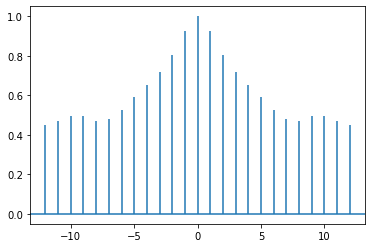

In [15]:
df2 = pd.to_numeric(df['demand'],downcast='float')
plt.acorr(df2,maxlags=12)
pass

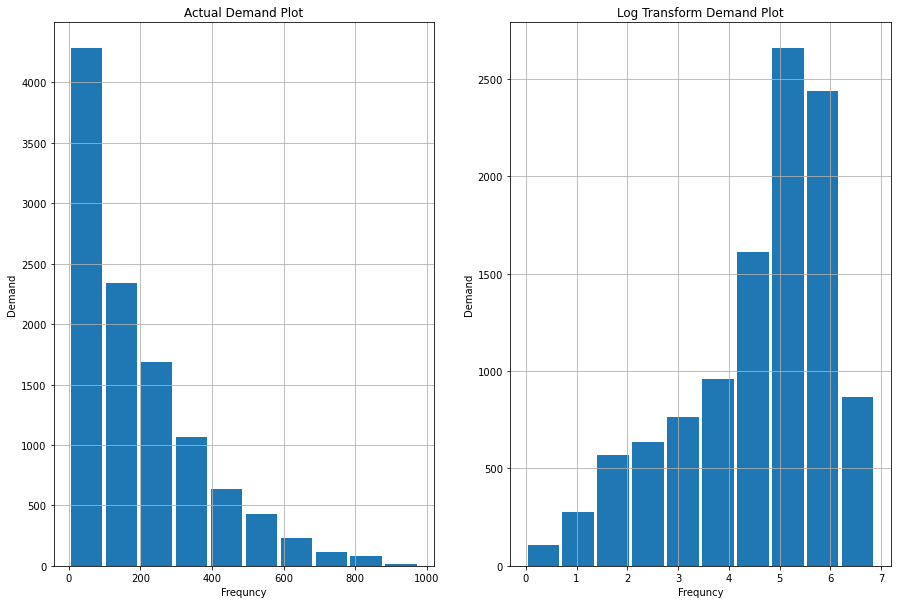

In [16]:
d1 = df['demand']
d2 = np.log(d1)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1,)
plt.title('Actual Demand Plot')
plt.xlabel('Frequncy')
plt.ylabel('Demand')
d1.hist(rwidth=0.9)

plt.subplot(1,2,2,)
plt.title('Log Transform Demand Plot')
plt.xlabel('Frequncy')
plt.ylabel('Demand')
d2.hist(rwidth=0.9)

pass

## Looks more normally distributed

In [17]:
df['demand'] = np.log(df['demand'])
df.head(2)

,season,weather,temp,humidity,windspeed,demand,month,hour
0,1,1,9.84,81,0.0,2.772589,1,0
1,1,1,9.02,80,0.0,3.688879,1,1


## Handling Outliers

<AxesSubplot:>

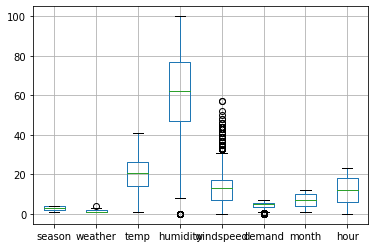

In [18]:
df.boxplot()

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

train_without_outliers =df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:>

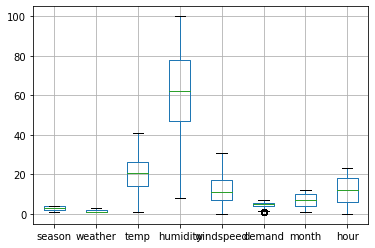

In [20]:
train_without_outliers.boxplot()

## Got rid of o

In [21]:
y_train = train_without_outliers[['demand']]
X_train = train_without_outliers.drop(['demand'],axis=1)

## Fit and Model Evaluation

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

## Saving Scaler and Polynomial regression

In [23]:
import pickle
from sklearn.pipeline import make_pipeline

pickle.dump(pipeline, open('./model.sav', 'wb'))
